## Multiple Linear Regression 

### 50 Startups
This dataset has data collected for 50 business Startups. The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending. Assume that all of them to be in INR lakhs.

##**Problem Statement: For the given investments in R&D, Administration and Marketing, predict the Profit.**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [ ]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing the dataset
dataset = pd.read_csv('gdrive/My Drive/DS-Online-Training/Data-Files/50_Startups_upd.csv')
print(dataset.shape)
dataset.head()

(50, 4)


,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values
print(X[:5])
print()
print(y[:5])

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]]

[192261.83 191792.06 191050.39 182901.99 166187.94]


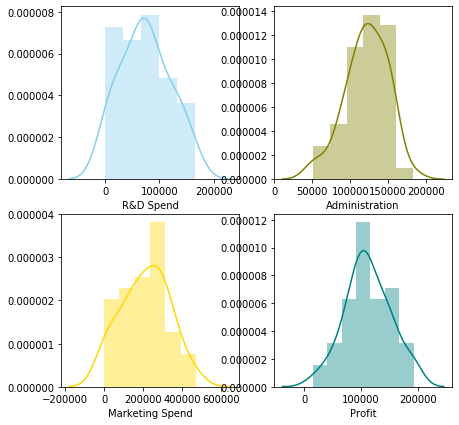

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(7,7))
sb.distplot( dataset["R&D Spend"] , color="skyblue", ax=axes[0, 0])
sb.distplot( dataset["Administration"] , color="olive", ax=axes[0, 1])
sb.distplot( dataset["Marketing Spend"] , color="gold", ax=axes[1, 0])
sb.distplot( dataset["Profit"] , color="teal", ax=axes[1, 1])

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
Profit             50 non-null float64
dtypes: float64(4)
memory usage: 1.7 KB


In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


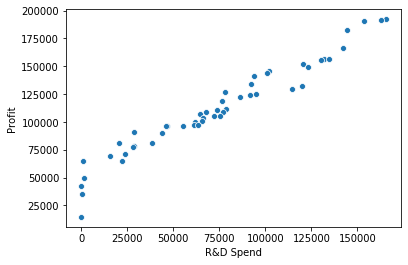

In [ ]:
sb.scatterplot(dataset["R&D Spend"] , dataset["Profit"])

In [ ]:
np.corrcoef(dataset["R&D Spend"] , dataset["Profit"])[0,1]

0.9729004656594832

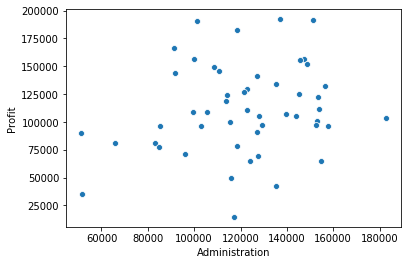

In [ ]:
sb.scatterplot(dataset["Administration"] , dataset["Profit"])

In [ ]:
np.corrcoef(dataset["Administration"] , dataset["Profit"])[0,1]

0.20071656826872128

In [ ]:
from scipy.stats.stats import pearsonr
pearsonr(dataset["Administration"] , dataset["Profit"])

(0.20071656826872133, 0.16221739470358268)

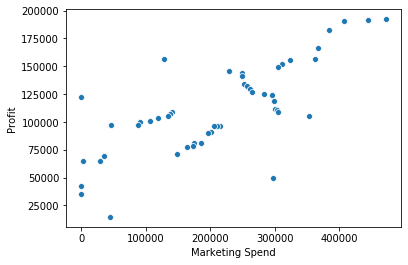

In [ ]:
sb.scatterplot(dataset["Marketing Spend"] , dataset["Profit"])

In [ ]:
np.corrcoef(dataset["Marketing Spend"] , dataset["Profit"])[0,1]

0.7477657217414767

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 3)
(40,)
(10, 3)
(10,)


In [ ]:
print(y_train)
print(y_test)

[ 96778.92  96479.51 105733.54  96712.8  124266.9  155752.6  132602.65
  64926.08  35673.41 101004.64 129917.04  99937.59  97427.84 126992.93
  71498.49 118474.03  69758.98 152211.77 134307.35 107404.34 156991.12
 125370.37  78239.91  14681.4  191792.06 141585.52  89949.14 108552.04
 156122.51 108733.99  90708.19 111313.02 122776.86 149759.96  81005.76
  49490.75 182901.99 192261.83  42559.73  65200.33]
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Calculate the accuracy of learning by the Algorithm
regressor.score(X_train,y_train) 

0.9499572530324031

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_test)
print()
print(y_pred)

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]

[103901.8969696  132763.05993126 133567.90370044  72911.78976736
 179627.92567224 115166.64864795  67113.5769057   98154.80686776
 114756.11555221 169064.01408795]


In [ ]:
# Calcualte the accuracy of prediction (y_test Vs y_pred) # This measure is part of Model Evaluation
r2_score(y_test, y_pred)

0.9393955917820571

In [ ]:
# Calculate the Model Error (RMSE) # This measure is also part of Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

8803.77579046934